In [13]:
import openpyxl
import pandas as pd
pelican_data = pd.read_excel(r'C:\Users\User\Downloads\HW_statistics\PelicanStores6.xlsx')

# Descriptive statistics for Net Sales by type of customer
net_sales_by_customer_type = pelican_data.groupby('Type of Customer')['Net Sales'].describe()

# Descriptive statistics for Net Sales by method of payment (Proprietary Card or not)
pelican_data['Used Proprietary Card'] = pelican_data['Method of Payment'] == 'Proprietary Card'
net_sales_by_payment_method = pelican_data.groupby('Used Proprietary Card')['Net Sales'].describe()

# Descriptive statistics for Net Sales for customers aged 45 and above
net_sales_for_age_45_above = pelican_data[pelican_data['Age'] >= 45]['Net Sales'].describe()

net_sales_by_customer_type, net_sales_by_payment_method, net_sales_for_age_45_above


(                  count        mean        std    min    25%      50%  \
 Type of Customer                                                        
 Promotional        70.0  140.438286  86.639797  23.83  82.74  115.345   
 Regular            55.0   93.069636  51.243904  17.25  54.77   82.460   
 
                       75%     max  
 Type of Customer                   
 Promotional       174.275  397.10  
 Regular           108.410  255.41  ,
                        count        mean        std    min      25%     50%  \
 Used Proprietary Card                                                         
 False                   68.0  101.965294  71.808808  17.25  52.0425   83.54   
 True                    57.0  140.629298  77.576557  41.42  82.4600  122.10   
 
                             75%     max  
 Used Proprietary Card                    
 False                  110.1125  383.03  
 True                   169.0900  397.10  ,
 count     52.000000
 mean     120.559231
 std       68.22

In [14]:
# Function to calculate percentiles and quartiles using the "exclusive" approach
def calculate_percentiles_exclusive(data, percentiles):
    # Sort the data
    sorted_data = data.sort_values()
    # Calculate ranks using the exclusive formula
    ranks = [(p/100) * (len(sorted_data) + 1) for p in percentiles]
    # Interpolate to find the percentile values
    percentile_values = [sorted_data.iloc[max(int(rank) - 1, 0)] for rank in ranks]
    return percentile_values

# Define the percentiles to calculate
percentiles_to_calculate = [30, 25, 95, 75]  # 25th and 75th are the first and third quartiles respectively

# Calculate percentiles for Age using the exclusive approach
age_percentiles_exclusive = calculate_percentiles_exclusive(pelican_data['Age'], percentiles_to_calculate)

# Calculate IQR (Interquartile Range) as the difference between the 75th and 25th percentiles
iqr_exclusive = age_percentiles_exclusive[3] - age_percentiles_exclusive[1]

age_percentiles_exclusive, iqr_exclusive


([32, 30, 65, 50], 20)

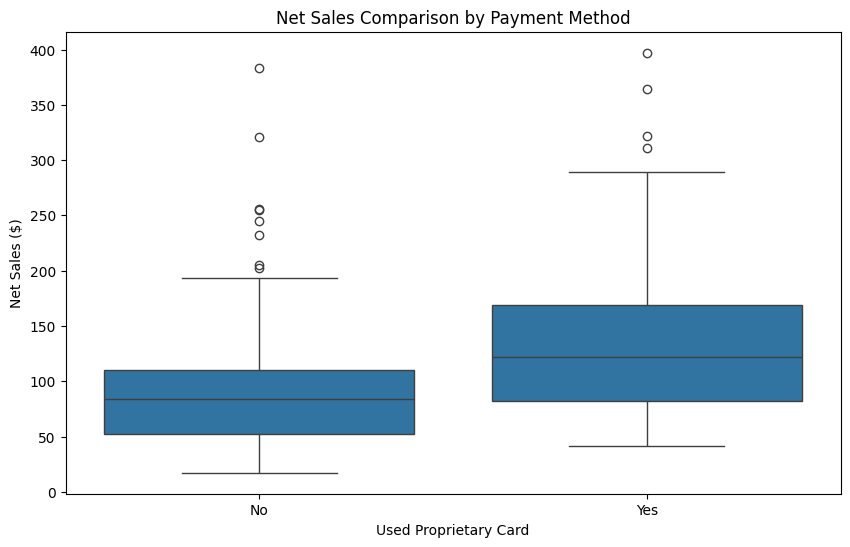

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create box plots comparing net sales based on the method of payment (Proprietary Card or not)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Used Proprietary Card', y='Net Sales', data=pelican_data)
plt.title('Net Sales Comparison by Payment Method')
plt.xlabel('Used Proprietary Card')
plt.ylabel('Net Sales ($)')
plt.xticks([0, 1], ['No', 'Yes'])  # Label x-axis with more descriptive labels

# Display the plot
plt.show()


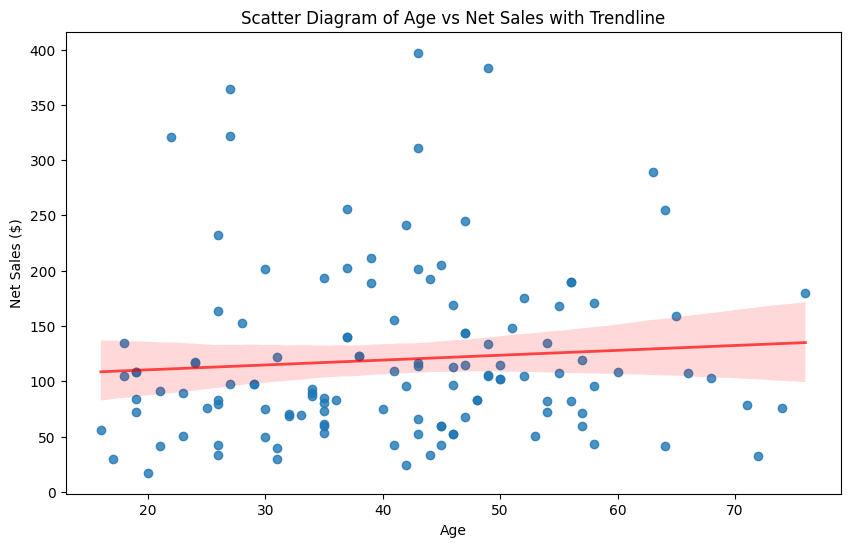

(None, 0.07957290866499511)

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation coefficient between Age and Net Sales
correlation_coefficient = pelican_data['Age'].corr(pelican_data['Net Sales'])

# Create a scatter diagram with a trendline
plt.figure(figsize=(10, 6))
sns.regplot(x='Age', y='Net Sales', data=pelican_data, line_kws={"color":"red","alpha":0.7,"lw":2})
plt.title('Scatter Diagram of Age vs Net Sales with Trendline')
plt.xlabel('Age')
plt.ylabel('Net Sales ($)')

# Display the plot and correlation coefficient
plt.show(), correlation_coefficient


In [18]:
# Create a contingency table with counts
contingency_table = pd.crosstab(index=pelican_data['Type of Customer'], columns=pelican_data['Marital Status'], margins=True)

# Calculate row percentages
contingency_table_percentage = contingency_table.div(contingency_table['All'], axis=0) * 100
contingency_table_percentage = contingency_table_percentage.drop(columns='All').drop('All')

# Format the table to include counts and percentages
contingency_table_formatted = contingency_table.drop(columns='All').drop('All').astype(str) + " (" + contingency_table_percentage.round(1).astype(str) + "%)"

contingency_table_formatted


Marital Status,Married,Single
Type of Customer,,
Promotional,59 (84.3%),11 (15.7%)
Regular,27 (49.1%),28 (50.9%)
